Datos cargados correctamente.
Primeras 5 filas del dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Información ge

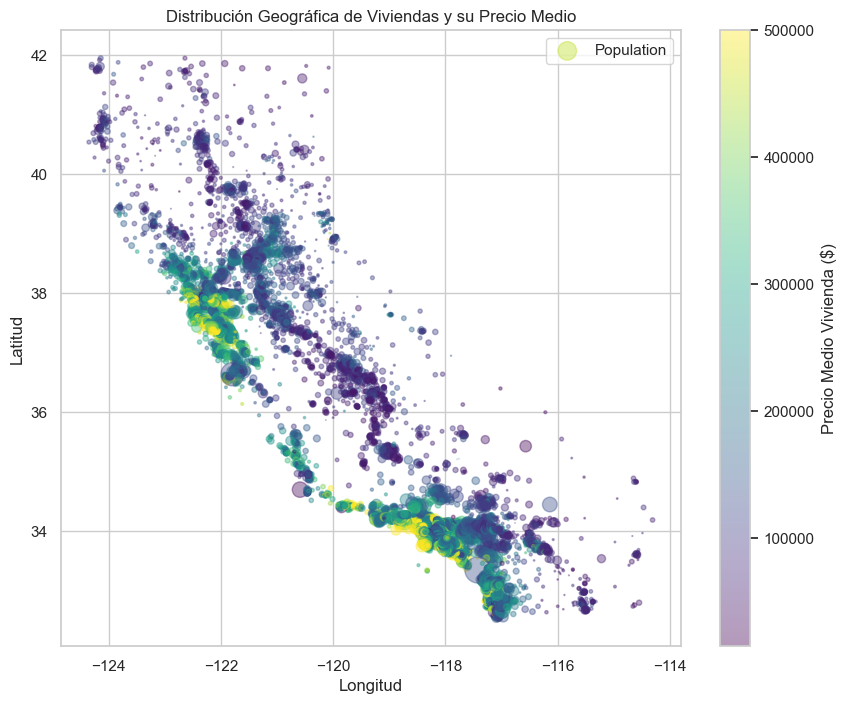


Paso 2: Seleccionando y normalizando latitud y longitud...
Datos normalizados (primeras 5 filas):
[[ 1.05254828 -1.32783522]
 [ 1.04318455 -1.32284391]
 [ 1.03850269 -1.33282653]
 [ 1.03850269 -1.33781784]
 [ 1.03850269 -1.33781784]]

Paso 3: Entrenando modelo K-Means con k=3...
Se generaron 3 clústeres.
Visualizando los clústeres generados (k=3)...


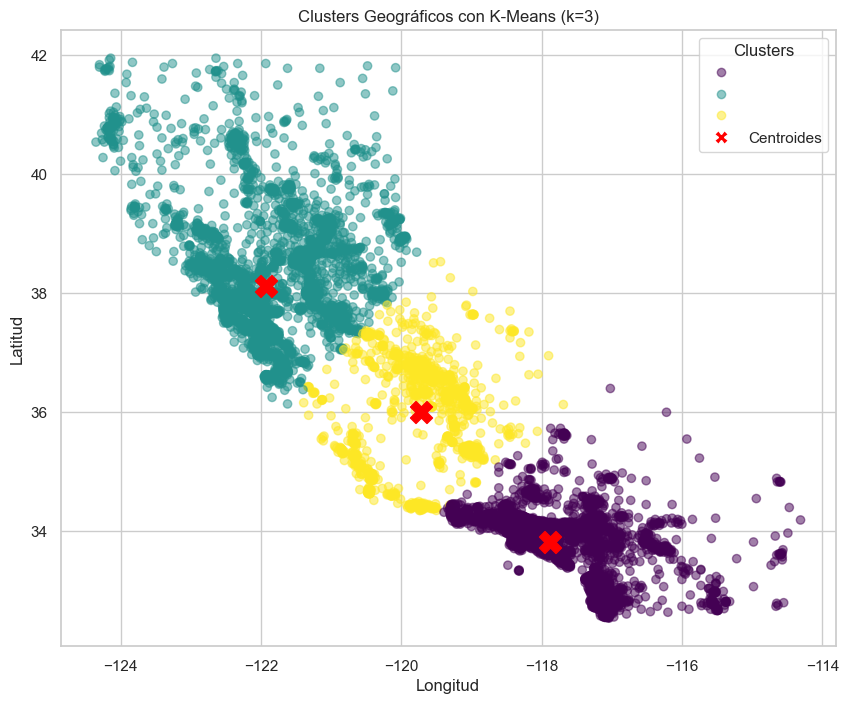


Paso 4: Evaluando el modelo con k=3 usando la puntuación de silueta...
Puntuación de Silueta promedio para k=3: 0.6467

Precio medio de vivienda por clúster (k=3):
cluster_k3
0    219603.297897
1    208509.901430
2    123661.749051
Name: median_house_value, dtype: float64

Paso 5: Probando diferentes valores de k (2 a 8) para encontrar el óptimo...
Para k=2, Inercia: 6240.83, Puntuación Silueta: 0.7549
Para k=3, Inercia: 4254.57, Puntuación Silueta: 0.6467
Para k=4, Inercia: 3388.86, Puntuación Silueta: 0.6248
Para k=5, Inercia: 2820.59, Puntuación Silueta: 0.6038
Para k=6, Inercia: 2499.71, Puntuación Silueta: 0.5387
Para k=7, Inercia: 1599.06, Puntuación Silueta: 0.5725
Para k=8, Inercia: 1470.39, Puntuación Silueta: 0.5593


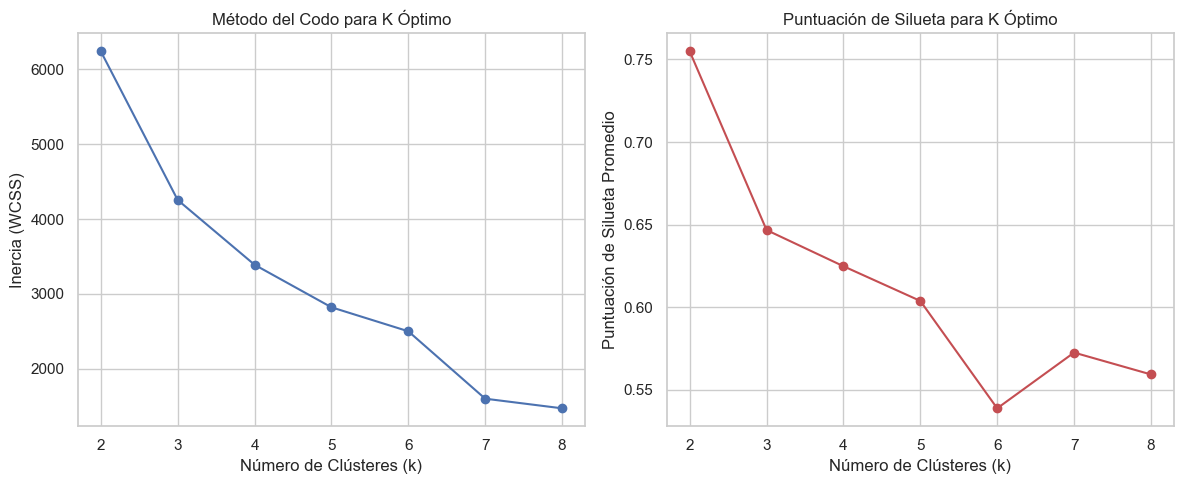


Basado en la puntuación de silueta máxima, el k óptimo sugerido es: 2

Paso 6: Entrenando modelo final con k=2 y visualizando...
Puntuación de Silueta promedio para k=2: 0.7549


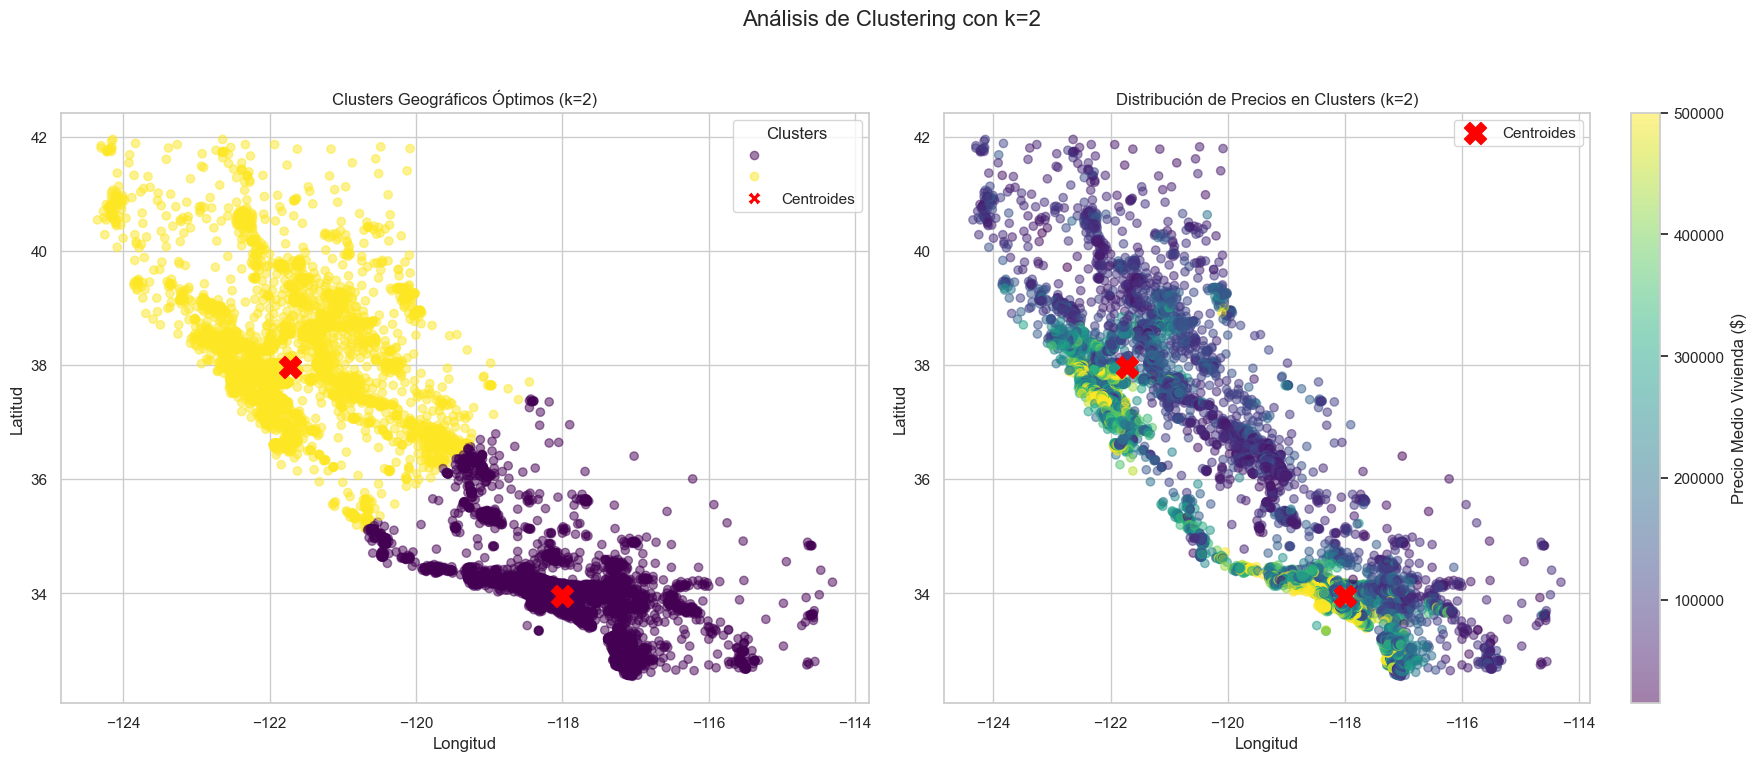


Precio medio de vivienda por clúster (k=2):
                     mean    median  count
cluster_k2                                
0           213769.519568  185600.0  11958
1           197333.350150  165900.0   8682

Análisis completado.
Se han generado 2 clústeres geográficos.
Los gráficos muestran la asignación de clústeres y cómo se relacionan con los precios de las viviendas.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings

# Configuraciones adicionales
warnings.filterwarnings('ignore', category=FutureWarning) # Ignorar avisos futuros de sklearn/pandas si los hubiera
sns.set(style="whitegrid") # Estilo para los graficos de seaborn/matplotlib

# Paso 0: Cargar los Datos
# Asegurate de que la ruta al archivo 'housing.csv' sea correcta.
# Usamos la ruta proporcionada por el contexto de la subida del archivo.
file_path = 'housing.csv'

# Carga directa sin manejo de errores explicito
housing_df = pd.read_csv(file_path)
print("Datos cargados correctamente.")
print("Primeras 5 filas del dataset:")
print(housing_df.head())
print("\nInformación general del DataFrame:")
housing_df.info()

# Verificar si hay valores nulos en las columnas relevantes
print("\nValores nulos por columna (relevantes):")
print(housing_df[['latitude', 'longitude', 'median_house_value']].isnull().sum())
# Si hubiera nulos y no se manejaran, podrian causar errores mas adelante.
# Considerar: housing_df.dropna(subset=['latitude', 'longitude', 'median_house_value'], inplace=True)

# Paso 1: Visualizar Datos Geograficos y Precios
print("\nPaso 1: Visualizando datos de latitud/longitud vs precio medio...")
plt.figure(figsize=(10, 8))
scatter_price = plt.scatter(housing_df['longitude'], housing_df['latitude'],
                            alpha=0.4, s=housing_df['population']/100, # Tamaño del punto por poblacion (opcional)
                            label='Population', c=housing_df['median_house_value'],
                            cmap=plt.get_cmap('viridis')) # Colorear por precio medio
plt.colorbar(scatter_price, label='Precio Medio Vivienda ($)')
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Distribución Geográfica de Viviendas y su Precio Medio")
plt.legend()
plt.grid(True)
plt.show()

# Paso 2: Seleccionar y Normalizar Coordenadas
print("\nPaso 2: Seleccionando y normalizando latitud y longitud...")
# Seleccionar las características para el clustering
features = ['latitude', 'longitude']
X = housing_df[features]

# Normalizar las caracteristicas para que tengan el mismo peso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datos normalizados (primeras 5 filas):")
print(X_scaled[:5])

# Paso 3: Entrenar Modelo K-Means (k=3) y Visualizar
print("\nPaso 3: Entrenando modelo K-Means con k=3...")
k_initial = 3
kmeans_initial = KMeans(n_clusters=k_initial,
                        init='k-means++',
                        n_init='auto',
                        random_state=42)

# Entrenar el modelo con los datos normalizados
kmeans_initial.fit(X_scaled)

# Obtener las etiquetas de cluster y centroides
clusters_initial = kmeans_initial.labels_
centroids_scaled_initial = kmeans_initial.cluster_centers_
centroids_initial = scaler.inverse_transform(centroids_scaled_initial)

# Añadir las etiquetas de clúster al DataFrame original
housing_df['cluster_k3'] = clusters_initial

print(f"Se generaron {k_initial} clústeres.")

# Visualizar los clusteres generados (k=3)
print("Visualizando los clústeres generados (k=3)...")
plt.figure(figsize=(10, 8))
scatter_k3 = plt.scatter(housing_df['longitude'], housing_df['latitude'],
                         c=housing_df['cluster_k3'], cmap='viridis', alpha=0.5)
plt.scatter(centroids_initial[:, 1], centroids_initial[:, 0],
            s=250, marker='X', c='red', label='Centroides')
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title(f"Clusters Geográficos con K-Means (k={k_initial})")
legend_elements = scatter_k3.legend_elements()
plt.legend(handles=legend_elements[0] + [plt.Line2D([0], [0], marker='X', color='w', label='Centroides',
                          markerfacecolor='red', markersize=10)], title="Clusters")
plt.grid(True)
plt.show()

# Paso 4: Evaluar Modelo (k=3) con Puntuacion de Silueta
print("\nPaso 4: Evaluando el modelo con k=3 usando la puntuacion de silueta...")
silhouette_avg_initial = silhouette_score(X_scaled, clusters_initial)
print(f"Puntuación de Silueta promedio para k={k_initial}: {silhouette_avg_initial:.4f}")

# Observar cómo se alinean los clusteres con los precios medios
print(f"\nPrecio medio de vivienda por clúster (k={k_initial}):")
print(housing_df.groupby('cluster_k3')['median_house_value'].mean().sort_values(ascending=False))

# Paso 5: Determinar Numero Optimo de Clústeres (Metodo del Codo y Silueta)
print("\nPaso 5: Probando diferentes valores de k (2 a 8) para encontrar el optimo...")
inertia_values = []
silhouette_scores = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Para k={k}, Inercia: {kmeans.inertia_:.2f}, Puntuación Silueta: {score:.4f}")

# Graficar el Metodo del Codo (Inercia vs k)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Inercia (WCSS)")
plt.title("Método del Codo para K Óptimo")
plt.xticks(k_range)
plt.grid(True)

# Graficar la Puntuacion de Silueta vs k
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='r')
plt.xlabel("Numero de Clusteres (k)")
plt.ylabel("Puntuación de Silueta Promedio")
plt.title("Puntuacion de Silueta para K optimo")
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()

# Determinar k óptimo (basado en el pico de silueta) - sin manejo de errores
# Si silhouette_scores estuviera vacío o tuviera un formato inesperado, esto podría fallar.
k_optimal = k_range[np.argmax(silhouette_scores)]
print(f"\nBasado en la puntuación de silueta máxima, el k óptimo sugerido es: {k_optimal}")

# Paso 6: Entrenar Modelo con K Óptimo y Visualizar Resultados Finales
print(f"\nPaso 6: Entrenando modelo final con k={k_optimal} y visualizando...")

# Entrenar K-Means con el k optimo encontrado
kmeans_optimal = KMeans(n_clusters=k_optimal, init='k-means++', n_init='auto', random_state=42)
kmeans_optimal.fit(X_scaled)

# Obtener las etiquetas y centroides finales
clusters_optimal = kmeans_optimal.labels_
centroids_scaled_optimal = kmeans_optimal.cluster_centers_
centroids_optimal = scaler.inverse_transform(centroids_scaled_optimal)

# Añadir las etiquetas optimas al DataFrame
housing_df[f'cluster_k{k_optimal}'] = clusters_optimal

# Evaluar el modelo optimo
silhouette_avg_optimal = silhouette_score(X_scaled, clusters_optimal)
print(f"Puntuación de Silueta promedio para k={k_optimal}: {silhouette_avg_optimal:.4f}")

# Visualizar los clusteres resultantes (optimos)
plt.figure(figsize=(18, 8))

# Grafico 1: Clusteres coloreados por ID de cluster
plt.subplot(1, 2, 1)
scatter_optimal_id = plt.scatter(housing_df['longitude'], housing_df['latitude'],
                                 c=housing_df[f'cluster_k{k_optimal}'], cmap='viridis', alpha=0.5)
plt.scatter(centroids_optimal[:, 1], centroids_optimal[:, 0],
            s=250, marker='X', c='red', label='Centroides')
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title(f"Clusters Geográficos Óptimos (k={k_optimal})")
legend_elements_opt = scatter_optimal_id.legend_elements()
plt.legend(handles=legend_elements_opt[0] + [plt.Line2D([0], [0], marker='X', color='w', label='Centroides',
                          markerfacecolor='red', markersize=10)], title="Clusters")
plt.grid(True)

# Grafico 2: Clusteres coloreados por precio medio de vivienda
plt.subplot(1, 2, 2)
scatter_optimal_price = plt.scatter(housing_df['longitude'], housing_df['latitude'],
                                    c=housing_df['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter_optimal_price, label='Precio Medio Vivienda ($)')
plt.scatter(centroids_optimal[:, 1], centroids_optimal[:, 0],
            s=250, marker='X', c='red', label='Centroides')
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title(f"Distribución de Precios en Clusters (k={k_optimal})")
plt.legend()
plt.grid(True)

plt.suptitle(f"Análisis de Clustering con k={k_optimal}", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Analizar la distribucion de precios en los clusteres optimos
print(f"\nPrecio medio de vivienda por clúster (k={k_optimal}):")
cluster_price_analysis = housing_df.groupby(f'cluster_k{k_optimal}')['median_house_value'].agg(['mean', 'median', 'count'])
print(cluster_price_analysis.sort_values(by='mean', ascending=False))

print("\nAnálisis completado.")
print(f"Se han generado {k_optimal} clústeres geográficos.")
print("Los gráficos muestran la asignación de clústeres y cómo se relacionan con los precios de las viviendas.")